<h1 align='center'>  Bangalore Air Quality Prediction </h1>
<h3 align='center'>  To predict the Air Quality of Bangalore City from 2013-2018 </h3>

## Model Building

### Algorithms
For our Analysis, we will be running the following algorithms.

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- Random Forest Regressor
- XGBoost Regressor
- ANN - Artificial Neural Network

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns/rows of the DataFrame.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Loading the required Data

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [3]:
print('Dimensionality of the obtained Data is: ', df.shape)

Dimensionality of the obtained Data is:  (737, 8)


## 2. Exploratory Data Analysis
### **Problem Statement:** To predict the Air Quality of Bangalore City from 2013-2018

In [4]:
## Checking for Null Values
df.isnull().any()

T         False
TM        False
Tm        False
H         False
VV        False
V         False
VM        False
PM 2.5     True
dtype: bool

<AxesSubplot:>

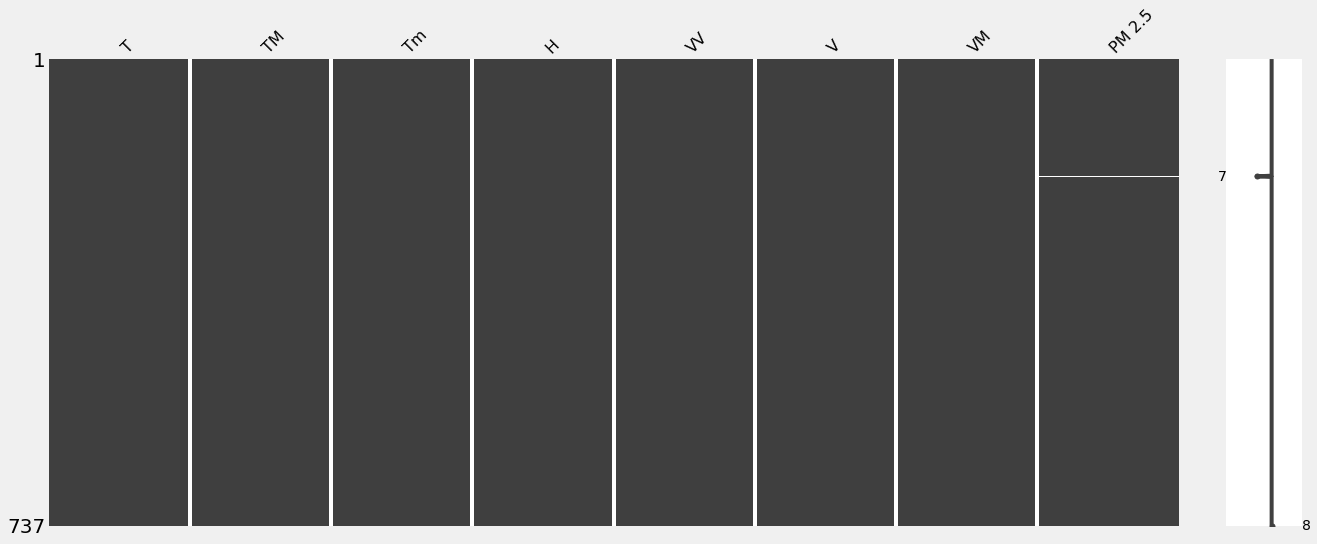

In [5]:
## Visualizing the Null values
missingno.matrix(df, figsize= (20,8))

In [6]:
# Understanding more about the missing value columns

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataset has 8 columns and 737 observations.

 There are 1 columns that have missing values.


,Missing Values,% of Total Values
PM 2.5,1,0.1


In [7]:
## Dropping the Null Values
df = df.dropna()

In [9]:
## Splitting our Data to Dependent and Independent Features
X = df.iloc[:,:-1] ### Independent Features
y = df.iloc[:,-1] ### Dependent Features

> ### Independent Features are those features with which we predict the Output Feature.

In [10]:
## Viewing the Feature Vector
X.head()

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4


- #### When we need to do Multivariate Analysis, it is always good to see how the Independent and the Dependent variables are related.

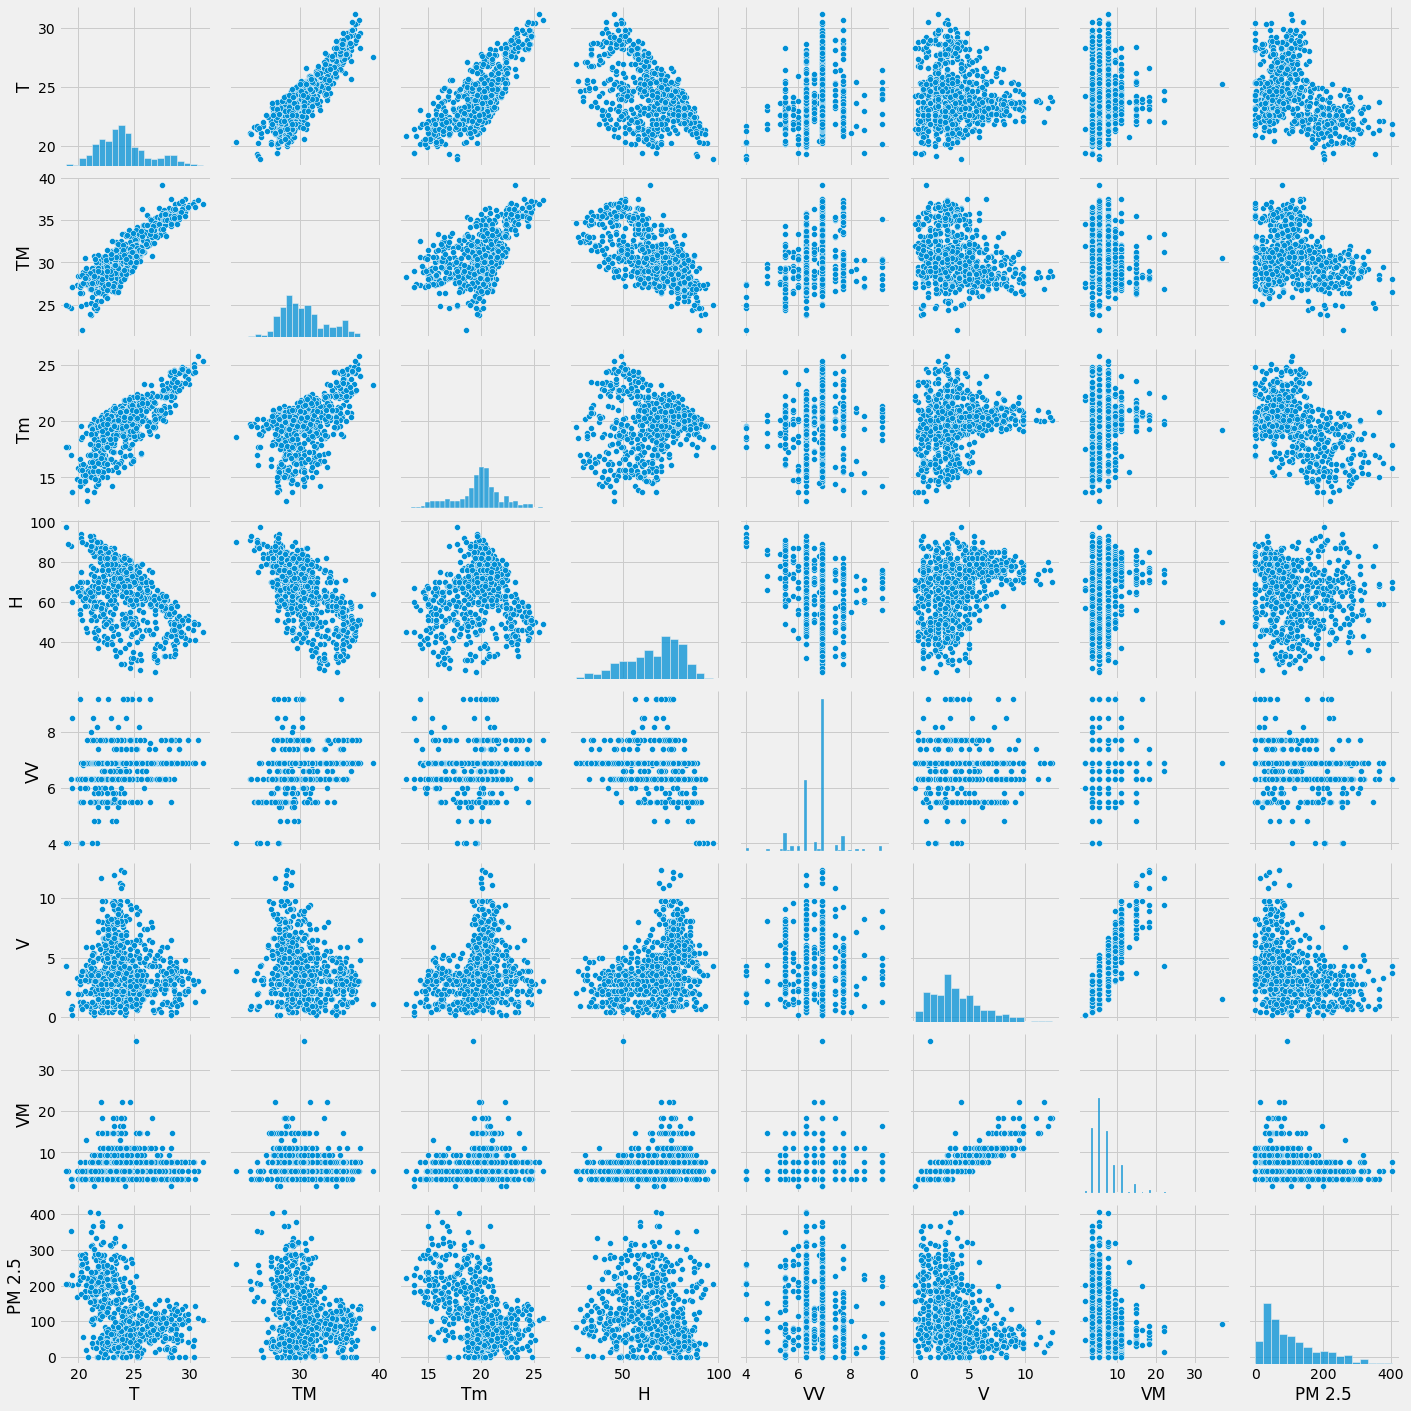

In [11]:
sns.pairplot(df)

> #### From the above plot we can see that there is no relationship between the Target and the Features. So it will not be possible to apply Linear Regression. Still we will build our model and then compare with the remaining Models.

## Correlation Martix

Correlation states how the Features are linearly related to the Target variable.
- Correlation can be Positive (Increase in Feature also Increases the Target) or Negative (Increase in Feature Decreases the Target).

In [13]:
## Understanding the Correlation
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.882433,0.772471,-0.479727,0.298138,-0.060587,-0.022747,-0.370754
TM,0.882433,1.000000,0.512705,-0.659010,0.275448,-0.233228,-0.160021,-0.194339
Tm,0.772471,0.512705,1.000000,0.101630,0.102964,0.217269,0.196513,-0.519450
H,-0.479727,-0.659010,0.101630,1.000000,-0.282130,0.380803,0.299179,-0.189129
VV,0.298138,0.275448,0.102964,-0.282130,1.000000,0.020445,0.007957,-0.138311
V,-0.060587,-0.233228,0.217269,0.380803,0.020445,1.000000,0.792492,-0.402463
VM,-0.022747,-0.160021,0.196513,0.299179,0.007957,0.792492,1.000000,-0.339834
PM 2.5,-0.370754,-0.194339,-0.519450,-0.189129,-0.138311,-0.402463,-0.339834,1.000000


<AxesSubplot:>

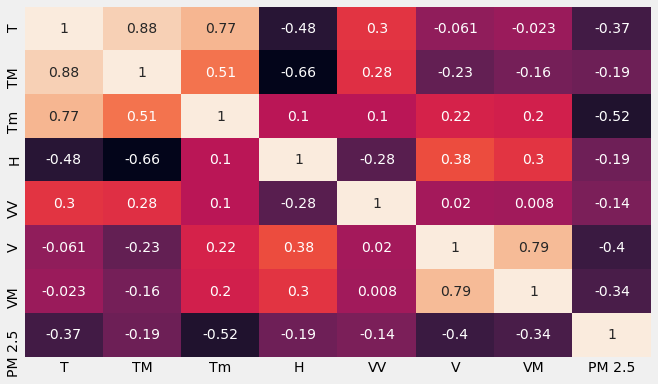

In [16]:
## Plotting Correlation - With Heatmaps
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(), annot= True, cbar= False)

## Feature Importance (Use only when we have large number of Features)
### To check if all the Independent Features are important or not.

- Feature Importance of each feature of our dataset can be obtained using the ***Feature Importance Property*** of the model.
- It is an inbuilt class that comes with Tree Based Models.

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor() 
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.18897681 0.11965865 0.27584874 0.10680856 0.0735042  0.15760739
 0.07759566]


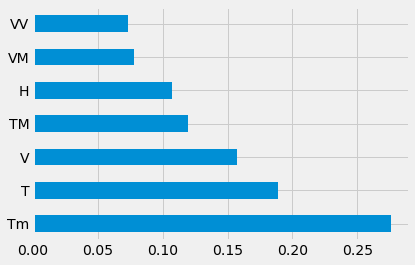

In [19]:
## Visualize the Feature Importance with a Graph
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind= 'barh')
plt.show()

## 3. Linear Regression Model

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

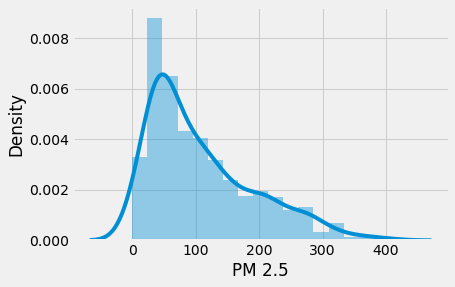

In [20]:
## Distribution of the Target variable.
sns.distplot(y)

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
## Getting the Intercept - Value we get when all the Independent Features are 0
regressor.intercept_

919.1470720405989

In [30]:
## Getting  the Coefficient/Slope Values 
regressor.coef_

array([-20.77304205,  -2.54667882,   1.51213623,  -2.44292303,
        -8.31653288, -12.0726292 ,   0.45360093])

In [24]:
print(f'Coefficient of determination R2 <-- on train set is: {regressor.score(X_train, y_train)}')
print()
print(f'Coefficient of determination R2 <-- on test set is: {regressor.score(X_test, y_test)}')

Coefficient of determination R2 <-- on train set is: 0.427680309259596

Coefficient of determination R2 <-- on test set is: 0.2642648396608529


In [29]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, cv= 5)
score.mean()        ## Gives a more generalized answer.

0.2652154413626041

### Model Evaluation

In [32]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns= ['Coefficient'])
coeff_df

,Coefficient
T,-20.773042
TM,-2.546679
Tm,1.512136
H,-2.442923
VV,-8.316533
V,-12.072629
VM,0.453601


- Interpreting the Coefficients:
    - Holding all others features fixed, a 1 unit increase in T is associated with a ***decrease of 20.773 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in Tm is associated with an ***increase of 1.512 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in TM is associated with a ***decrease of 2.546 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in H is associated with a ***decrease of 2.442 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in VV is associated with a ***decrease of 8.316 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in V is associated with a ***decrease of 12.072 in AQI PM2.5.***
    - Holding all others features fixed, a 1 unit increase in VM is associated with an ***increase of 0.453 in AQI PM2.5.***

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

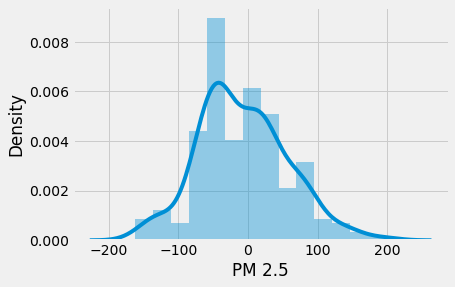

In [34]:
## Predict
prediction = regressor.predict(X_test)
sns.distplot(y_test-prediction)

- ### The difference between y_test and the prediction is almost a bell curve. Thus it is almost Gaussian.

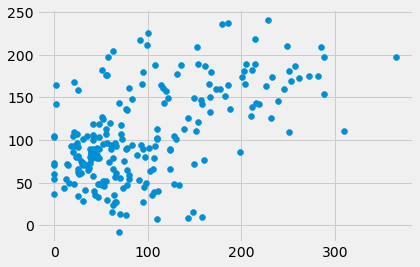

In [35]:
plt.scatter(y_test, prediction)

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.



In [36]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  51.92247143614923
MSE:  4116.797825994435
RMSE:  64.16227728186115


> ### To see if we have created a good model it is enough to just check if out distribution plot is somewhat Normal (Bell-Shaped).

In [37]:
import pickle

## Open a file, where we want to store the data.
file = open('regression_model.pkl', 'wb')

## Dump all the information to this file.
pickle.dump(regressor, file)